<a href="https://colab.research.google.com/github/nvwa0318/nvwa0318/blob/main/Project_for_supervise_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#import data
url = "https://drive.google.com/file/d/12kg8qbHsGMVikAoYtep3WwVHkxhtYLqV/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]


data = pd.read_csv(path)
data.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [ ]:
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')

In [ ]:
data['Expensive'].dropna()  #'Expensive'

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    1
1458    0
1459    0
Name: Expensive, Length: 1460, dtype: int64

In [ ]:
X=data

In [ ]:
y=X.pop('Expensive')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                            y, 
                                                            test_size=0.2, 
                                                            random_state=157)

In [ ]:
my_imputer = SimpleImputer() # initialize
my_imputer.fit(X_train) # fit on the train set
X_imputed_train = my_imputer.transform(X_train) # transform the train set
X_imputed_test = my_imputer.transform(X_test) # transform the test set

In [ ]:
# 2. initialize the model
my_tree = DecisionTreeClassifier(max_depth=4,
                                 min_samples_leaf=10
                                )

# 3. fit the model to the train data
my_tree.fit(X = X_imputed_train, 
            y = y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

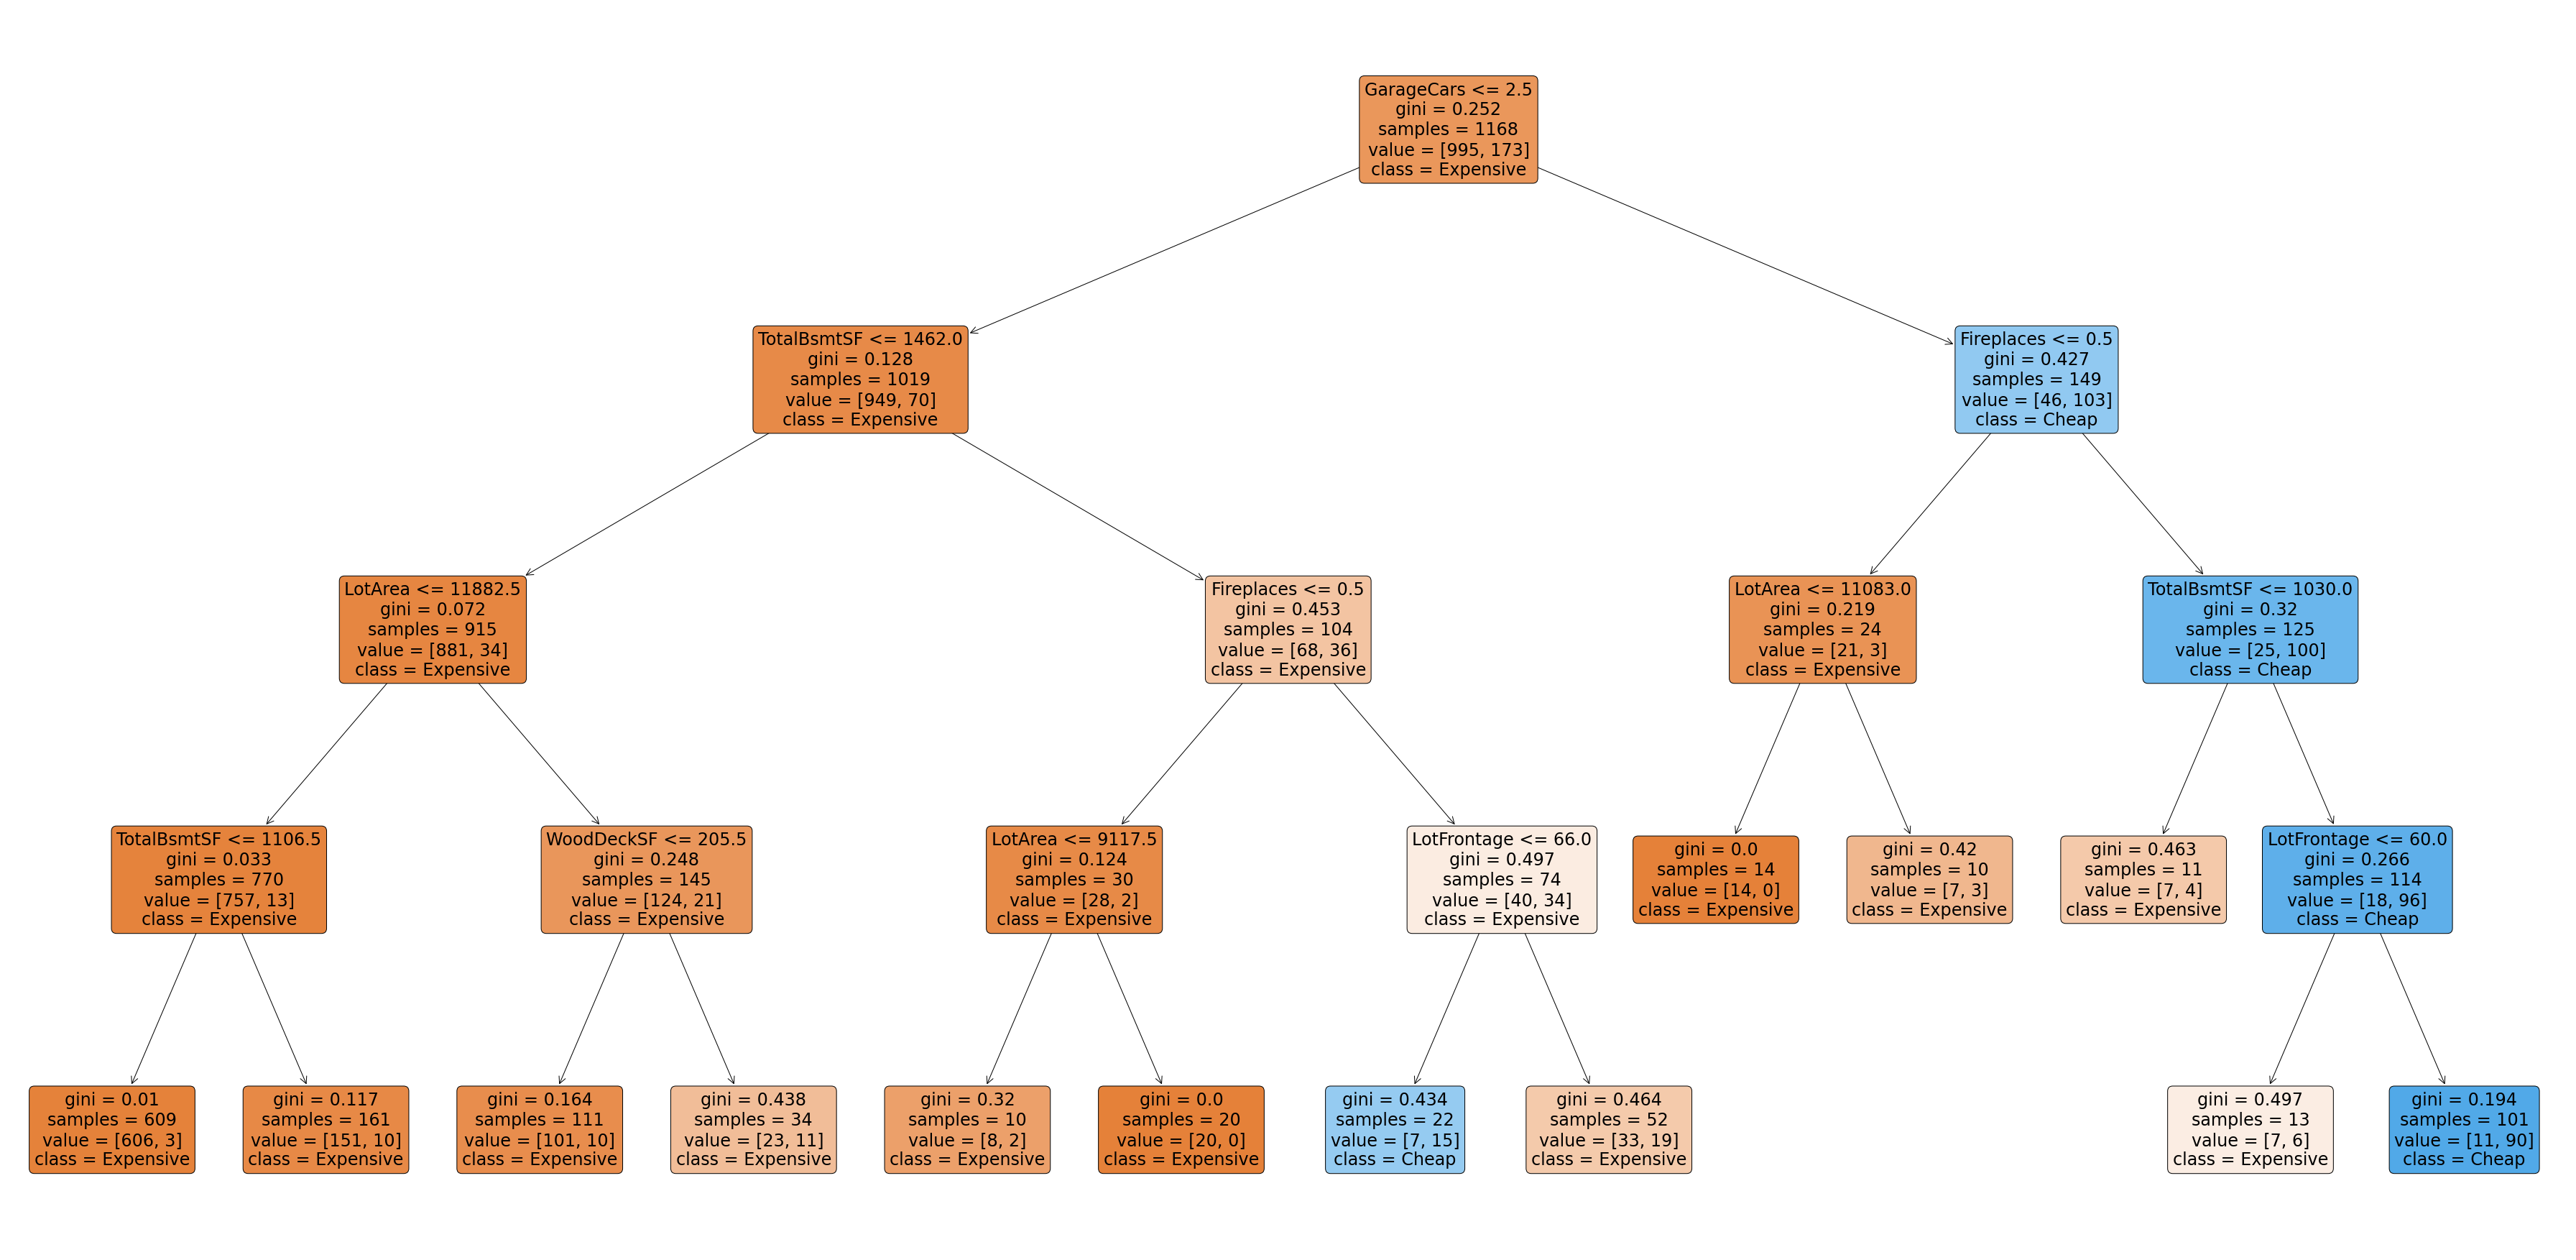

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True, 
     rounded=True, 
     class_names=['Expensive','Cheap'], 
     feature_names=X.columns
     );

In [ ]:
y_pred_tree_train = my_tree.predict(X_imputed_train)  #for train accuracy

accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train)

0.9263698630136986

In [ ]:
y_pred_tree_test = my_tree.predict(X_imputed_test)  #for test accuracy

accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test)

0.9143835616438356

**Creating the pipeline**

In [ ]:
# 1. initialize transformers &amp; model
imputer = SimpleImputer(strategy="median")
dtree = DecisionTreeClassifier(max_depth=4,
                               min_samples_leaf=10)
 
# 2. Create a pipeline*
pipe = make_pipeline(imputer, dtree)
 
# 3. Fit the pipeline to the training data
pipe.fit(X_train, y_train)
 
# 4. Use the pipeline to make predictions
pipe.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0])

**Using GridsearchCV to find the best parameters**

In [ ]:
# 1. initialize transformers &amp; model
imputer = SimpleImputer()
dtree = DecisionTreeClassifier()
 
# 2. Create a pipeline*
pipe = make_pipeline(imputer, dtree)

param_grid = {
    'decisiontreeclassifier__max_depth': range(2, 12),
    'decisiontreeclassifier__min_samples_leaf': range(3, 11, 2),
    'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
    'decisiontreeclassifier__criterion':['gini', 'entropy']
    }
    
from sklearn.model_selection import GridSearchCV
 
search = GridSearchCV(pipe, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=9, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use, 
                      verbose=1) # we want informative outputs during the training process

In [ ]:
search.fit(X_imputed_train, y_train)

Fitting 9 folds for each of 640 candidates, totalling 5760 fits


GridSearchCV(cv=9,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 12),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 11, 2),
                         'decisiontreeclassifier__min_samples_split': range(3, 40, 5)},
             scoring='accuracy', verbose=1)

In [ ]:
search.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 7,
 'decisiontreeclassifier__min_samples_leaf': 9,
 'decisiontreeclassifier__min_samples_split': 3}

In [ ]:
search.best_score_

0.9178360829523621

In [ ]:
search.fit(X_test, y_test)

Fitting 9 folds for each of 640 candidates, totalling 5760 fits


GridSearchCV(cv=9,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 12),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 11, 2),
                         'decisiontreeclassifier__min_samples_split': range(3, 40, 5)},
             scoring='accuracy', verbose=1)

In [ ]:
search.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 3,
 'decisiontreeclassifier__min_samples_leaf': 3,
 'decisiontreeclassifier__min_samples_split': 3}

In [ ]:
search.best_score_

0.907723063973064

In [ ]:
my_tree1 = DecisionTreeClassifier(max_depth=3,
                                 min_samples_leaf=3
                                )

# 3. fit the model to the train data
my_tree1.fit(X = X_imputed_train, 
            y = y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)

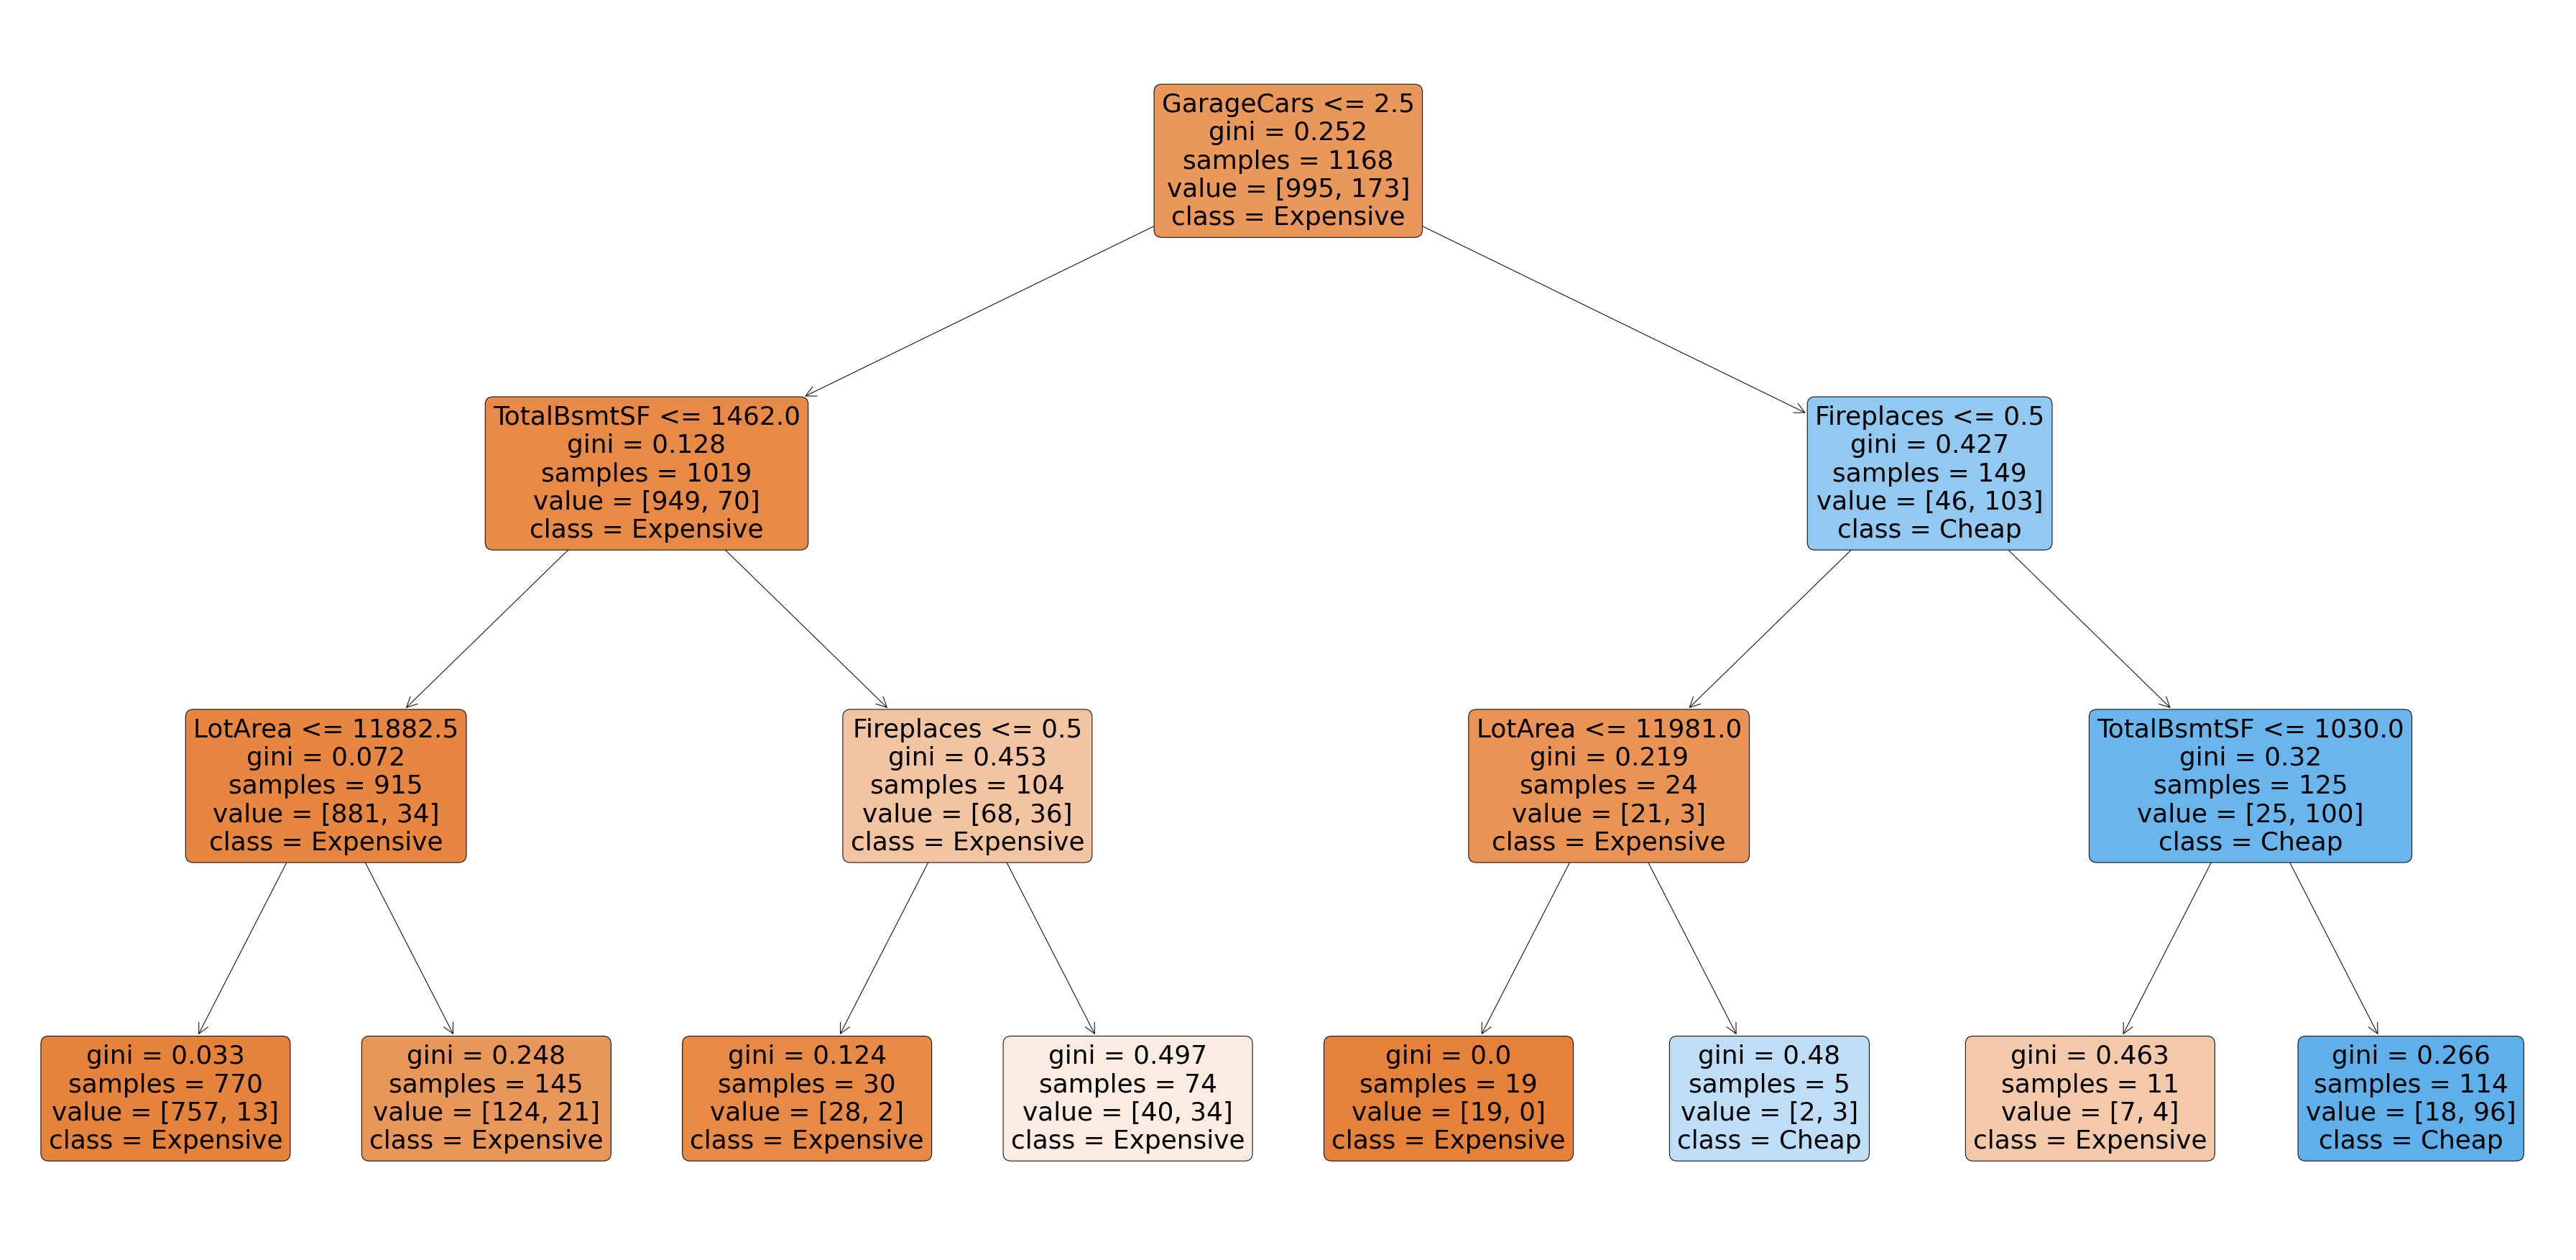

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree1,
     filled=True, 
     rounded=True, 
     class_names=['Expensive','Cheap'], 
     feature_names=X_train.columns
     );

In [ ]:
X_imputed_train = my_imputer.transform(X_train) # transform the train set
X_imputed_test = my_imputer.transform(X_test) # transform the test set

In [ ]:
my_tree2 = DecisionTreeClassifier(max_depth=3,
                                 min_samples_leaf=3
                                )

# 3. fit the model to the train data
my_tree2.fit(X = X_imputed_test, 
            y = y_test)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)

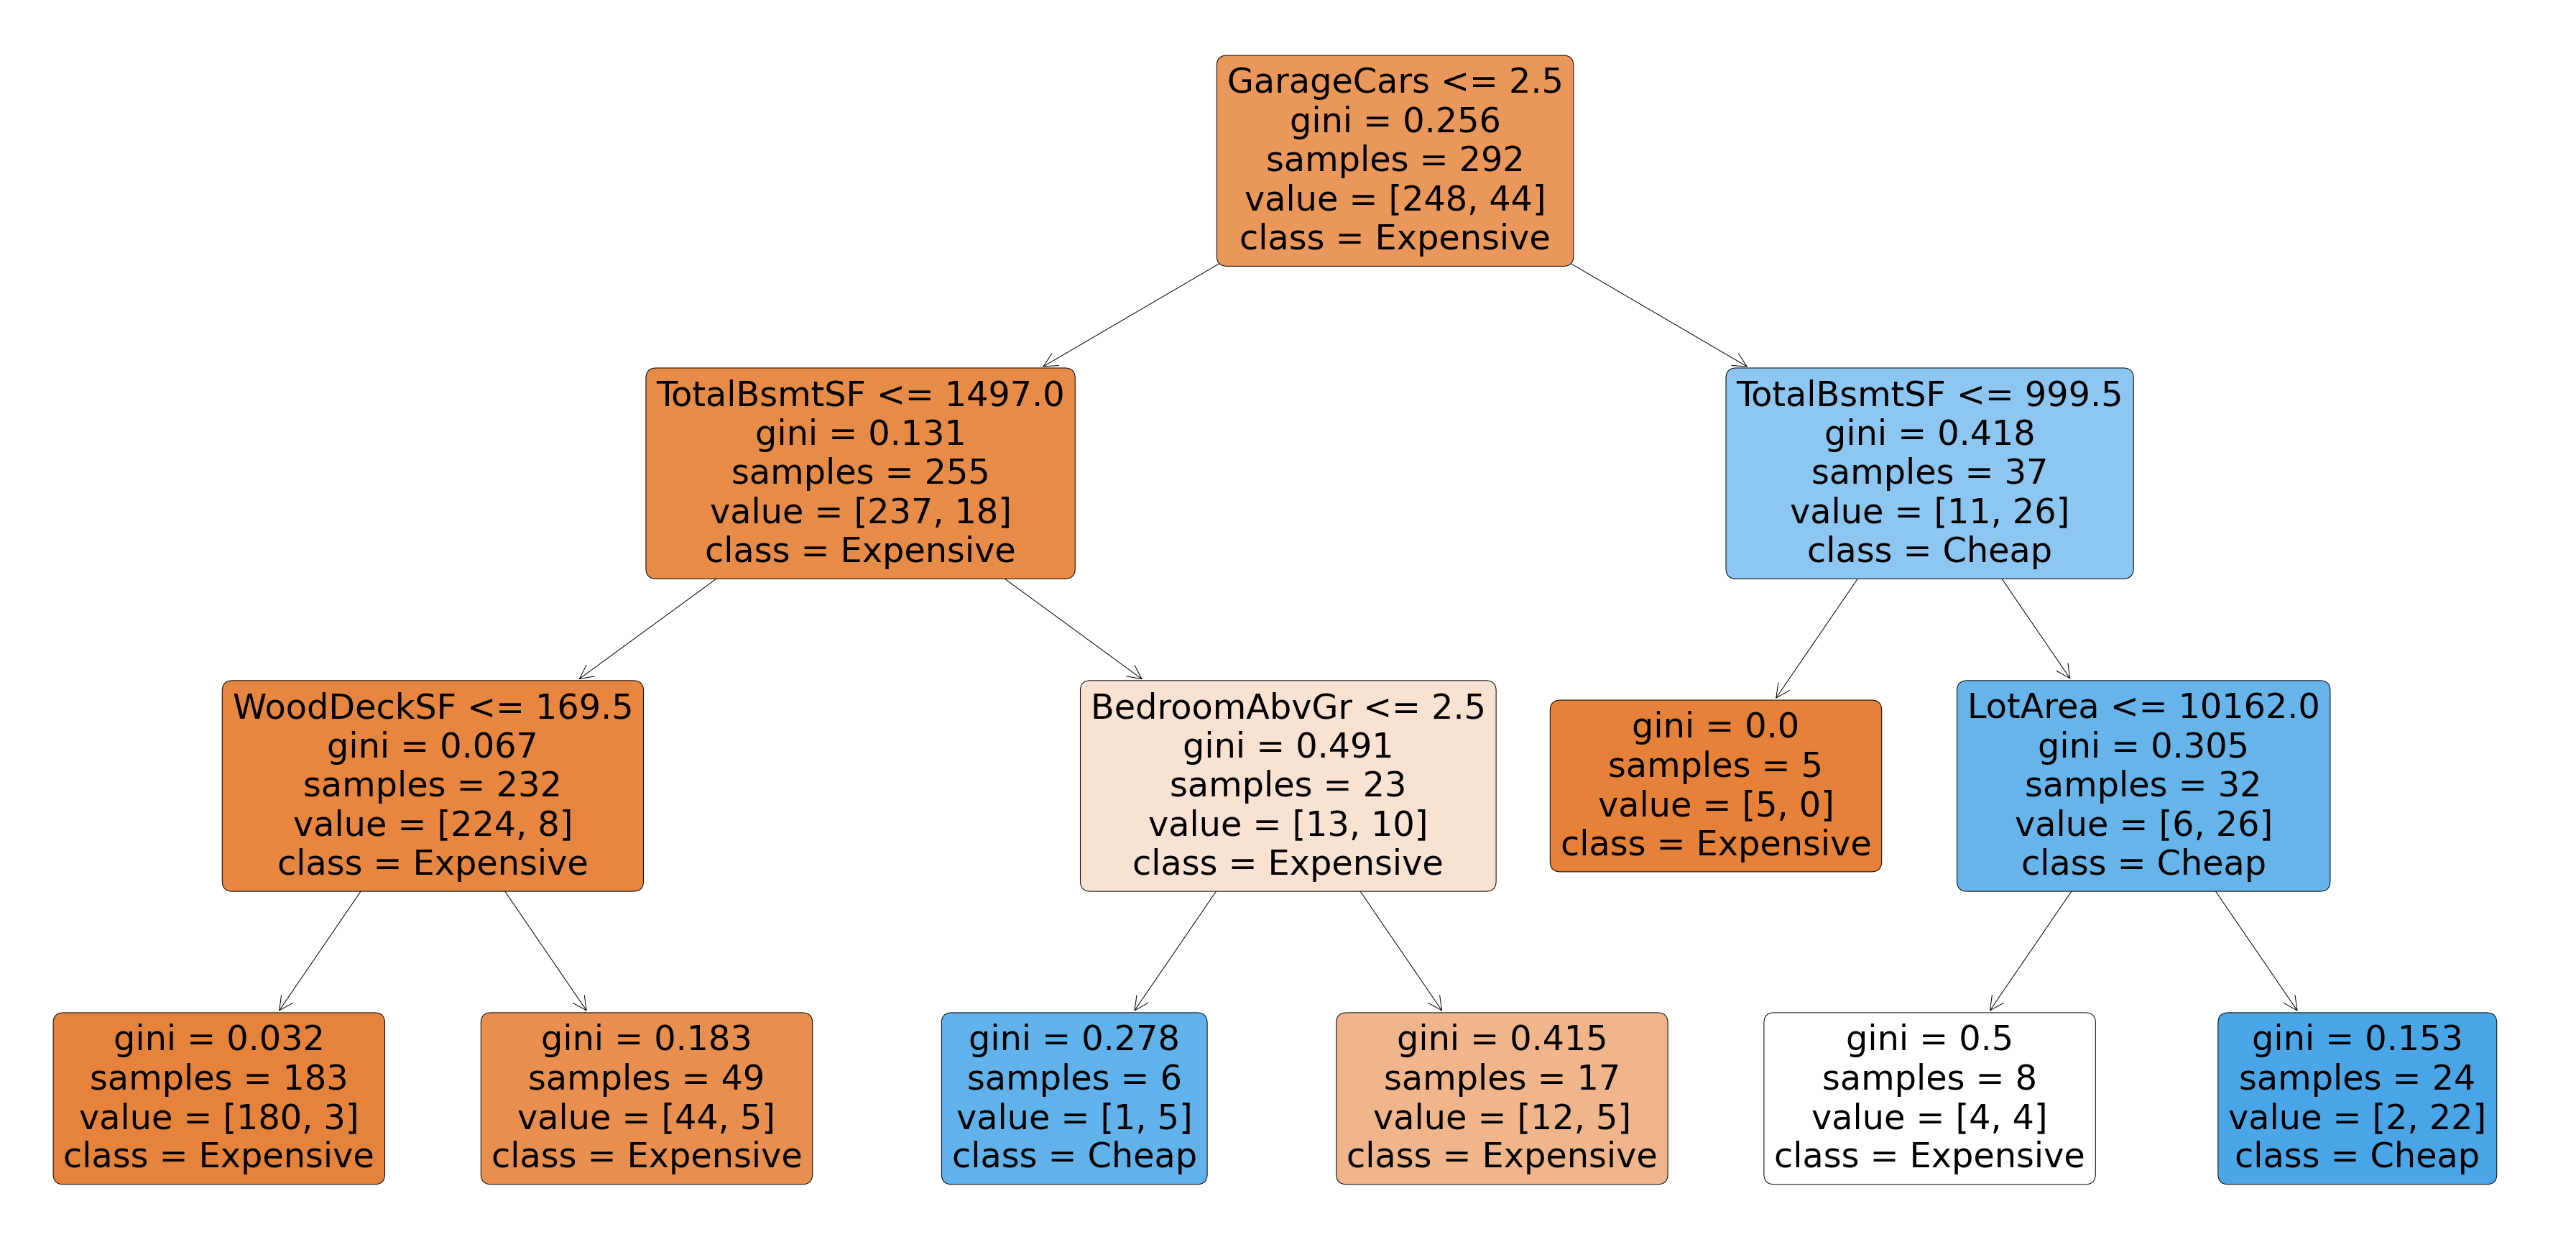

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree2,
     filled=True, 
     rounded=True, 
     class_names=['Expensive','Cheap'], 
     feature_names=X_test.columns
     );

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
def train_and_evaluate(clf, X_imputed_train, X__imputed_test, y_train, y_test):
    clf.fit(X_train, y_train)
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    print ("Classification Report:")
    print (classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (confusion_matrix(y_test, y_pred))

In [ ]:
train_and_evaluate(search, X_imputed_train, X_imputed_test, y_train, y_test)

Fitting 9 folds for each of 640 candidates, totalling 5760 fits
Accuracy on training set:
0.9366438356164384
Accuracy on testing set:
0.9041095890410958
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       248
           1       0.74      0.57      0.64        44

    accuracy                           0.90       292
   macro avg       0.83      0.77      0.79       292
weighted avg       0.90      0.90      0.90       292

Confusion Matrix:
[[239   9]
 [ 19  25]]


In [ ]:
#complete_data=data['Expensive'].dropna()   #data cleaning

In [ ]:
#complete_data

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    1
1458    0
1459    0
Name: Expensive, Length: 1460, dtype: int64